## INFR_Assignment_3 MDS201803

In [1]:
import json
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = []
articles = []
for line in open('/media/subhasish/Professional/CMI/Sem_3/Inf_ret/assignments/News_Category_Dataset_v2.json'):
    data.append(json.loads(line))

# extracting short descriptions as articles
for i in range(len(data)):
    articles.append(data[i]['short_description'])

In [3]:
# removing emoji
def remove_emoji(l):
    return l.encode('ascii', 'ignore').decode('ascii')

# expanding contracted words
def expand(l):
    l = re.sub(r"won\'t", "will not", l)
    l = re.sub(r"can\'t", "can not", l)
    l = re.sub(r"n\'t", " not", l)
    l = re.sub(r"\'re", " are", l)
    l = re.sub(r"\'s", " is", l)
    l = re.sub(r"\'d", " would", l)
    l = re.sub(r"\'ll", " will", l)
    l = re.sub(r"\'t", " not", l)
    l = re.sub(r"\'ve", " have", l)
    l = re.sub(r"\'m", " am", l)
    return l

# removing punctuations
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
def remove_punc(string):
    no_punct = ""
    for char in string:
        if char not in punctuations:
            no_punct += char
            string = no_punct
    return string        

In [4]:
# applying casefolding 
for i in range(len(articles)):
    articles[i] = remove_punc(expand(remove_emoji(articles[i].casefold())))

In [5]:
#removing duplicates
articles = list(set(articles) - set(['']))

In [6]:
# creating the term frequency dictionary
tokens = {}
for i in range(len(articles)):
    for j in articles[i].split():
        try:
            tokens[j] = tokens[j]+1
        except Exception:
            tokens[j] = 1

In [7]:
# prnting the fisrt 5 most common words
sorted(tokens.items(), key=lambda x: x[1], reverse=True)[:5]

[('the', 197651), ('to', 112546), ('a', 100396), ('of', 95101), ('and', 94661)]

In [8]:
top_30 = []
for i in sorted(tokens.items(), key=lambda x: x[1], reverse=True)[:30]:
    top_30.append(i[0])
top_30

['the',
 'to',
 'a',
 'of',
 'and',
 'is',
 'in',
 'that',
 'it',
 'i',
 'for',
 'you',
 'are',
 'not',
 'on',
 'we',
 'with',
 'have',
 'be',
 'this',
 'as',
 'was',
 'but',
 'your',
 'at',
 'from',
 'my',
 'can',
 'an',
 'will']

In [18]:
# Computes the proportion of first k frequent tokens out of total tokens
def compute_prop(k):
    # the top k frequent terms
    top_k = []
    for i in sorted(tokens.items(), key=lambda x: x[1], reverse=True)[:k]:
        top_k.append(i[0])
    # Total number of tokens:
    T = 0
    for i in tokens.keys():
        T = T+tokens[i]
    # Total frequency of the top 30 words:
    top_k_freq = 0
    for i in top_k:
        top_k_freq = top_k_freq+tokens[i]
    # proportion of total number of token occupied by the top 30 frequent words:
    prop = top_k_freq/T
    print('The proportion of top '+str(k)+' tokens is : ',100*prop)
    return prop

In [19]:
# Law of 30 is valid for the data
compute_prop(30)

The proportion of top 30 tokens is :  34.03115420323586


0.3403115420323586

In [20]:
len(tokens)

91706

In [21]:
k = np.arange(1, 200, 1)
p = np.array(list(map(compute_prop,k)))

The proportion of top 1 tokens is :  4.963532721606866
The proportion of top 2 tokens is :  7.789856664748901
The proportion of top 3 tokens is :  10.31106238148417
The proportion of top 4 tokens is :  12.699296821773034
The proportion of top 5 tokens is :  15.076481713122067
The proportion of top 6 tokens is :  17.449949938009517
The proportion of top 7 tokens is :  19.080285771470717
The proportion of top 8 tokens is :  20.218263749217428
The proportion of top 9 tokens is :  21.271386213628464
The proportion of top 10 tokens is :  22.26685012266255
The proportion of top 11 tokens is :  23.261259302025106
The proportion of top 12 tokens is :  24.23668334730013
The proportion of top 13 tokens is :  25.10379670035356
The proportion of top 14 tokens is :  25.9650337023799
The proportion of top 15 tokens is :  26.725292894662893
The proportion of top 16 tokens is :  27.416391955627024
The proportion of top 17 tokens is :  28.094834260532792
The proportion of top 18 tokens is :  28.7283501

The proportion of top 149 tokens is :  52.296711528672446
The proportion of top 150 tokens is :  52.36413888981666
The proportion of top 151 tokens is :  52.431541138349644
The proportion of top 152 tokens is :  52.498742485992814
The proportion of top 153 tokens is :  52.565592257078805
The proportion of top 154 tokens is :  52.632216014663754
The proportion of top 155 tokens is :  52.698463083080306
The proportion of top 156 tokens is :  52.76458458844071
The proportion of top 157 tokens is :  52.828923098404026
The proportion of top 158 tokens is :  52.89248311741929
The proportion of top 159 tokens is :  52.95586734815597
The proportion of top 160 tokens is :  53.0185484257783
The proportion of top 161 tokens is :  53.08110394034449
The proportion of top 162 tokens is :  53.14278051351774
The proportion of top 163 tokens is :  53.20420596057872
The proportion of top 164 tokens is :  53.2652547184713
The proportion of top 165 tokens is :  53.3261276880853
The proportion of top 166 t

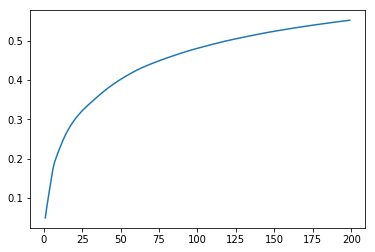

In [156]:
plt.plot(k,p)